<a href="https://colab.research.google.com/github/ibnmikhail48/Object_Detector_Project_DevTown/blob/main/Project_object_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectify: Real-Time Object Detection with OpenCV & YOLO

## Project Introduction
Object detection is everywhere around us - from security cameras to self-driving cars. Being able to identify and locate objects in real-time is a crucial skill in computer vision.

In this project, I will build a real-time object detection system that can identify multiple objects from live video feed using a webcam, displaying bounding boxes and labels around detected objects.


### What I'll accomplish:

- Learn computer vision fundamentals and object detection
- Work with pre-trained deep learning models (YOLOv5)
- Process live video streams for real-time inference
- Build a complete AI application from setup to deployment

### My Tech Stack:

- Python & Google Colab
- OpenCV for image/video processing
- PyTorch for deep learning
- YOLOv8 for object detection
- COCO dataset classes (80 different objects)

## Step 1: Environment Setup

- First, I need to set up my environment with the required libraries.

### What I'm doing:

- Installing Python dependencies, OpenCV, PyTorch, and YOLO dependencies. Then cloning YOLOv5 repository and verifying GPU/CPU availability.

In [1]:
# Install required dependencies
!pip install torch torchvision opencv-python-headless matplotlib

# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

# Verify GPU/CPU availability
import torch
print(f"Device available: {'GPU' if torch.cuda.is_available() else 'CPU'}")

Cloning into 'yolov5'...
remote: Enumerating objects: 17581, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 17581 (delta 40), reused 12 (delta 10), pack-reused 17510 (from 3)
Receiving objects: 100% (17581/17581), 16.70 MiB | 18.30 MiB/s, done.
Resolving deltas: 100% (12038/12038), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.9 MB/s eta 0:00:00
Device available: CPU


## Step 2: Load Pre-Trained Model

### What I'm doing:

- Importing YOLOv5 model and understanding class labels from COCO dataset.

In [2]:
# Go to YOLOv5 directory
%cd yolov5

# Import YOLOv5 model from the cloned repo
import torch

# Load pre-trained YOLOv5 model
model = torch.hub.load('.', 'yolov5s', source='local', pretrained=True)

# Set device
device = 'cpu'
model.to(device)

# Understanding COCO dataset class labels
print("COCO Dataset Classes:")
for i, class_name in model.names.items():
    if i < 10:  # Show first 10 classes
        print(f"{i}: {class_name}")
print("... and 70 more classes")

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.12.11 torch-2.8.0+cu126 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 28.5MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


COCO Dataset Classes:
0: person
1: bicycle
2: car
3: motorcycle
4: airplane
5: bus
6: train
7: truck
8: boat
9: traffic light
... and 70 more classes


## Step 3: Test with Static Images

### What I'm doing:

- Running inference on sample images and visualizing bounding boxes, labels, and confidence scores.

/content


Saving matriculation.jpg to matriculation (1).jpg


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


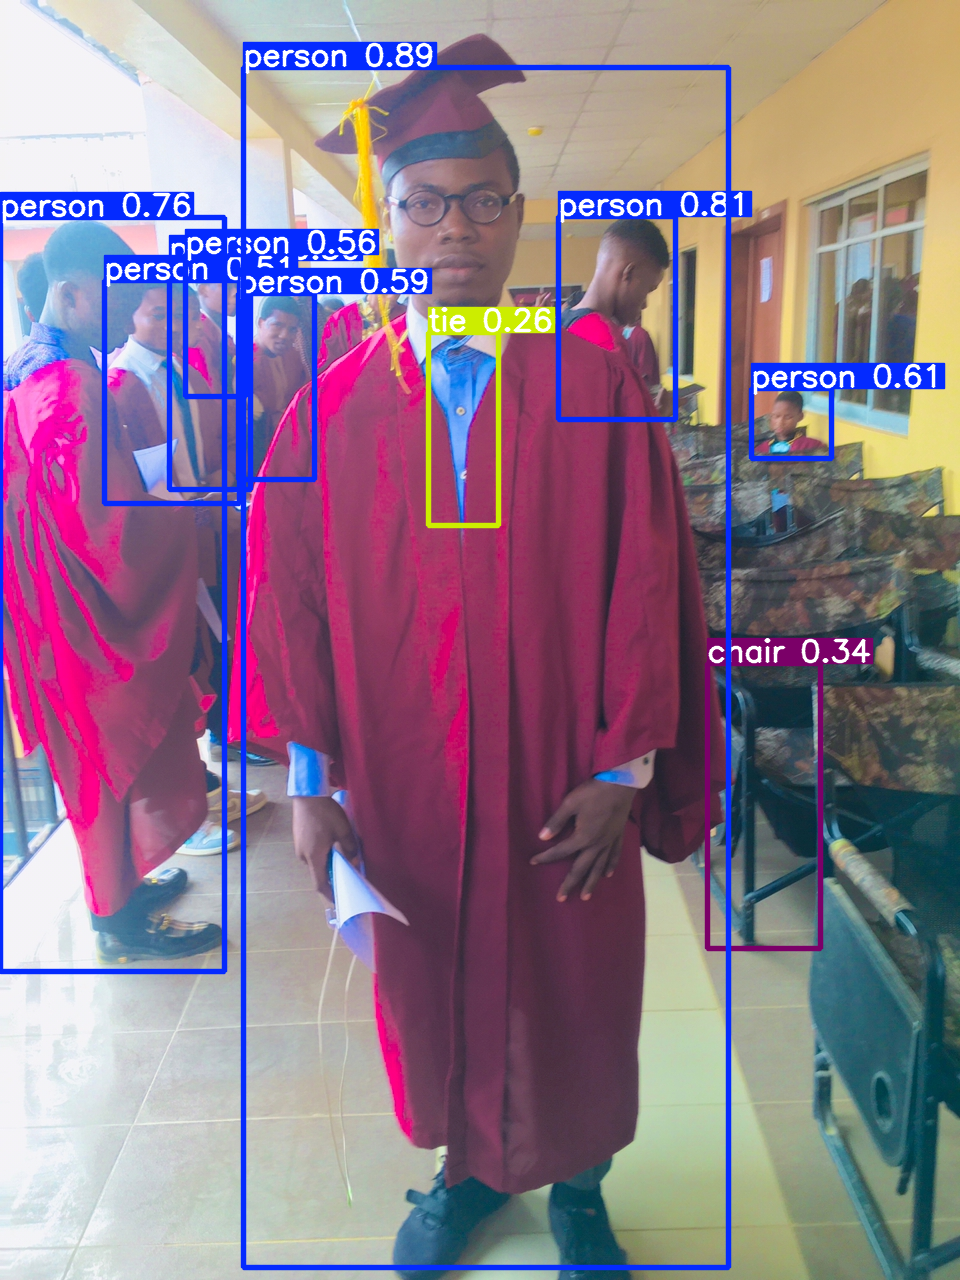


Found 10 objects:
--------------------------------------------------
Object or Label: person
Confidence: 0.894
Bounding Box: (244, 67, 728, 1268)
------------------------------
Object or Label: person
Confidence: 0.811
Bounding Box: (559, 216, 676, 419)
------------------------------
Object or Label: person
Confidence: 0.760
Bounding Box: (1, 217, 224, 971)
------------------------------
Object or Label: person
Confidence: 0.611
Bounding Box: (751, 389, 831, 458)
------------------------------
Object or Label: person
Confidence: 0.594
Bounding Box: (239, 293, 315, 479)
------------------------------
Object or Label: person
Confidence: 0.564
Bounding Box: (186, 254, 246, 397)
------------------------------
Object or Label: person
Confidence: 0.514
Bounding Box: (104, 280, 240, 504)
------------------------------
Object or Label: chair
Confidence: 0.341
Bounding Box: (708, 663, 820, 949)
------------------------------
Object or Label: person
Confidence: 0.299
Bounding Box: (170, 261, 25

In [4]:
# Go back to main directory
%cd /content

# Import necessary libraries
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Option 1: Use sample image from URL (or upload to imgbb.com for your own images)
# url = "https://i.ibb.co/jP8PtZHj/road-traffic-human.jpg"
# response = requests.get(url)
# img = Image.open(BytesIO(response.content))

# Option 2: Upload from local machine (uncomment below if needed)
from google.colab import files
uploaded = files.upload()
img = Image.open(list(uploaded.keys())[0])

# Run inference on the image
results = model(img)

# Display results with bounding boxes
results.show()

# Get detection details in pandas format
detections = results.pandas().xyxy[0]
print(f"\nFound {len(detections)} objects:")
print("-" * 50)

# Display detailed detection info
for idx, detection in detections.iterrows():
    print(f"Object or Label: {detection['name']}")
    print(f"Confidence: {detection['confidence']:.3f}")
    print(f"Bounding Box: ({detection['xmin']:.0f}, {detection['ymin']:.0f}, {detection['xmax']:.0f}, {detection['ymax']:.0f})")
    print("-" * 30)

## Step 4: Implement Real-Time Detection

### What I'm doing:

- Using webcam/video input with OpenCV, applying YOLO inference frame by frame, and displaying detected objects live with bounding boxes and labels.

<IPython.core.display.Javascript object>

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


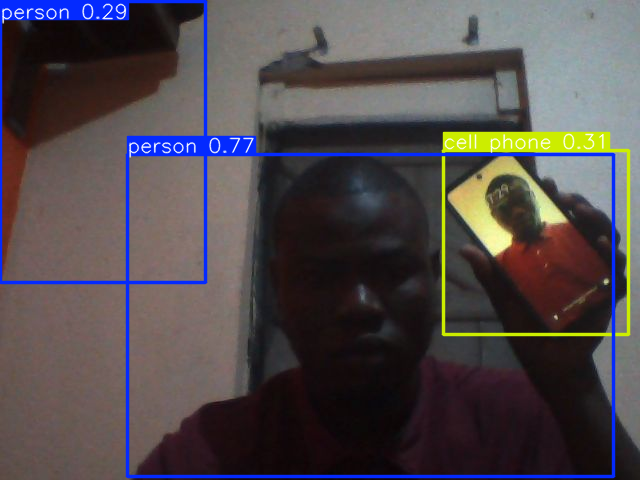

Real-time detection found 3 objects:
- person: 0.775
- cell phone: 0.313
- person: 0.288


In [6]:
import cv2
import numpy as np
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Function to take photo from webcam in Colab
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Take photo and run detection
photo_filename = take_photo()
img = Image.open(photo_filename)

# Run real-time detection on captured image
results = model(img)
results.show()

# Print detection results
detections = results.pandas().xyxy[0]
print(f"Real-time detection found {len(detections)} objects:")
for idx, detection in detections.iterrows():
    print(f"- {detection['name']}: {detection['confidence']:.3f}")

## Step 5: Customize & Optimize

### What I'm doing:

- Trying different confidence thresholds and experimenting with different input sizes for speed vs. accuracy.

In [7]:
# Test different confidence thresholds
confidence_levels = [0.25, 0.5, 0.7]

print("Testing different confidence thresholds:")
print("=" * 50)

for conf in confidence_levels:
    # Set confidence threshold
    model.conf = conf

    # Run inference with new confidence level
    results = model(img)
    detections = results.pandas().xyxy[0]

    print(f"\nConfidence threshold: {conf}")
    print(f"Objects detected: {len(detections)}")

    for idx, detection in detections.iterrows():
        print(f"  - {detection['name']}: {detection['confidence']:.3f}")

# Test different input sizes
print("\n" + "=" * 50)
print("Testing different input sizes:")

input_sizes = [320, 640, 1280]  # smaller = faster, larger = more accurate

for size in input_sizes:
    print(f"\nInput size: {size}x{size}")

    # Run inference with different input sizes
    results = model(img, size=size)
    detections = results.pandas().xyxy[0]

    print(f"Objects detected: {len(detections)}")
    print(f"Optimization: {'Fast inference' if size <= 640 else 'High accuracy'}")

    # Show top detections for this size
    for idx, detection in detections.head(3).iterrows():
        print(f"  - {detection['name']}: {detection['confidence']:.3f}")

Testing different confidence thresholds:


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):



Confidence threshold: 0.25
Objects detected: 3
  - person: 0.775
  - cell phone: 0.313
  - person: 0.288


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):



Confidence threshold: 0.5
Objects detected: 1
  - person: 0.775


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):



Confidence threshold: 0.7
Objects detected: 1
  - person: 0.775

Testing different input sizes:

Input size: 320x320
Objects detected: 1
Optimization: Fast inference
  - person: 0.915

Input size: 640x640


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Objects detected: 1
Optimization: Fast inference
  - person: 0.775

Input size: 1280x1280


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Objects detected: 0
Optimization: High accuracy
